# 逻辑回归


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 预览数据 && 绘制散点图


In [26]:
data = pd.read_csv(
    "ex2data1.txt", header=None, names=["example_1", "example_2", "Admitted"]
)
data.head()

,example_1,example_2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


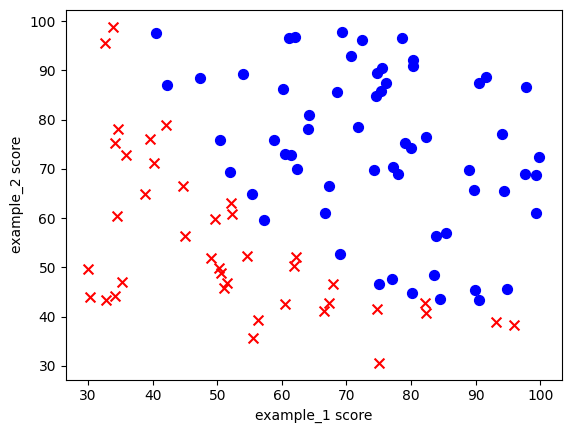

In [27]:
positive = data[data["Admitted"] == 1]
negative = data[data["Admitted"] == 0]
fig, ax = plt.subplots()

ax.scatter(positive["example_1"], positive["example_2"], s=50, c="b", marker="o")  # type: ignore
ax.scatter(negative["example_1"], negative["example_2"], s=50, c="r", marker="x")  # type: ignore
ax.set_xlabel("example_1 score")
ax.set_ylabel("example_2 score")

plt.show()

### 代价函数
$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}$

In [44]:
x_ = data[["example_1", "example_2"]]
x_.insert(0, "ones", 1)
x = np.array(x_)
y = np.array(data[["Admitted"]])
theta = np.zeros((1, x.shape[1]))
x.shape, y.shape, theta.shape

((100, 3), (100, 1), (1, 3))

In [48]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))


sigmoid(0)


def costFunction(x: np.ndarray, y: np.ndarray, theta: np.ndarray):
    m = x.shape[0]
    h = np.log(sigmoid(x @ theta.T))  # (m,n)
    return np.sum((-y * h) - (1 - y) * np.log(1 - sigmoid(x @ theta.T))) / m


costFunction(x, y, theta)

0.6931471805599453

In [ ]:
def gradient():
    ...